Sentiment analysis is the process of determining the emotional tone or attitude expressed in a piece of text. In the context of reviews:

Positive Sentiment: Indicates a favorable or positive opinion, often associated with satisfaction or appreciation.

Negative Sentiment: Indicates a critical or unfavorable opinion, often associated with dissatisfaction or criticism.

Neutral Sentiment: Indicates a lack of strong positive or negative opinions. The text may be factual or not strongly inclined toward either positive or negative emotions.

In [23]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the vader_lexicon resource
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer instance
sentiments = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [43]:
# Load your dataset (replace 'your_data.csv' with your actual file name)
data = pd.read_csv('nyka_top_brands_cosmetics_product_reviews.csv')
print(data.head())

   product_id brand_name  review_id                         review_title  \
0      781070       Olay   16752142                 Worth buying 50g one   
1      781070       Olay   14682550           Best cream to start ur day   
2      781070       Olay   15618995  perfect for summers dry for winters   
3      781070       Olay   13474509                    Not a moisturizer   
4      781070       Olay   16338982                              Average   

                                         review_text          author  \
0  Works as it claims. Could see the difference f...   Ashton Dsouza   
1  It does what it claims . Best thing is it smoo...    Amrit Neelam   
2  I have been using this product for months now....    Sanchi Gupta   
3  i have an oily skin, while this whip acts as a...      Ruchi Shah   
4  It's not that good. Please refresh try for oth...  Sukanya Sarkar   

           review_date  review_rating  is_a_buyer  pro_user    review_label  \
0  2021-01-23 15:17:18         

In [44]:
print(data.describe())

         product_id     review_id  review_rating           mrp         price  \
count  6.128400e+04  6.128400e+04   61283.000000  61284.000000  61284.000000   
mean   7.983802e+05  1.484995e+07       4.414781    573.260247    462.129512   
std    1.281418e+06  7.383506e+06       1.062547    324.098930    264.876964   
min    2.500000e+02  9.600000e+01       1.000000     75.000000     45.000000   
25%    1.604880e+05  1.102373e+07       4.000000    300.000000    262.000000   
50%    4.524430e+05  1.525142e+07       5.000000    599.000000    400.000000   
75%    7.665290e+05  2.002927e+07       5.000000    799.000000    639.000000   
max    7.749427e+06  2.963031e+07       5.000000   3874.000000   2947.000000   

       product_rating  product_rating_count  
count    61284.000000          61284.000000  
mean         4.099130           7582.963840  
std          0.235945          14463.246136  
min          1.500000              1.000000  
25%          4.000000           1760.000000  
50%

As this dataset is very large, it contains some missing values, so let’s remove all the rows containing the missing values:

In [45]:
data = data.dropna()

## **Checking For Null Values**

In [72]:
data.isnull().sum()

product_id              0
brand_name              0
review_id               0
review_title            0
review_text             0
author                  0
review_date             0
review_rating           0
is_a_buyer              0
pro_user                0
review_label            0
product_title           0
mrp                     0
price                   0
product_rating          0
product_rating_count    0
product_tags            0
product_url             0
dtype: int64

# **Handling Missing Values**

In [62]:
default_value = 'not_verified'
data['review_label'] = data['review_label'].fillna(default_value)


In [69]:
mean_rating = data['review_rating'].mean()
data['review_rating'] = data['review_rating'].fillna(mean_rating)


In [71]:
data = data.dropna(subset=['review_text'])
data['review_text'] = data['review_text'].fillna('')


<ipython-input-71-5f64751bd402>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review_text'] = data['review_text'].fillna('')


## **Min-Max scaling to normalize data**

In [73]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['mrp', 'price']


scaler = MinMaxScaler()


data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])


# **Decesion Tree**

In [74]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree, export_text
from sklearn.metrics import accuracy_score
import graphviz
from IPython.display import Image

In [75]:
x = data[['brand_name', 'review_rating', 'is_a_buyer', 'pro_user', 'mrp', 'price', 'product_rating', 'product_rating_count']]
y = data['review_label'] # target as it contains true and false



In [76]:
x = pd.get_dummies(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [77]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion='entropy', max_features='log2')

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9997824076592504


In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100, 100))
plot_tree(clf, feature_names=x.columns, max_depth=3, filled=True);

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [80]:
y_pred = clf.predict(X_test)

In [81]:
cm = confusion_matrix(y_test, y_pred)

In [82]:
cm

array([[14420,     0,     0],
       [    0,   129,     4],
       [    0,     0,  3830]])

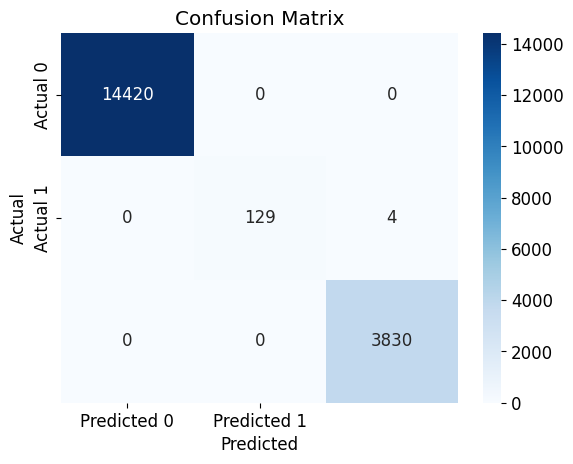

In [84]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


- The top-left element (14420) represents the True Negatives (TN).
- The top-right element (0) represents the False Positives (FP).
- The bottom-left element (0) represents the False Negatives (FN).
- The bottom-right element (3830) represents the True Positives (TP).

Sentiment Analysis of Product Reviews
The Score column of this dataset contains the ratings that customers have given to the product based on their experience with the product. So let’s take a look at the rating breakdown to see how most customers rate the products they buy :

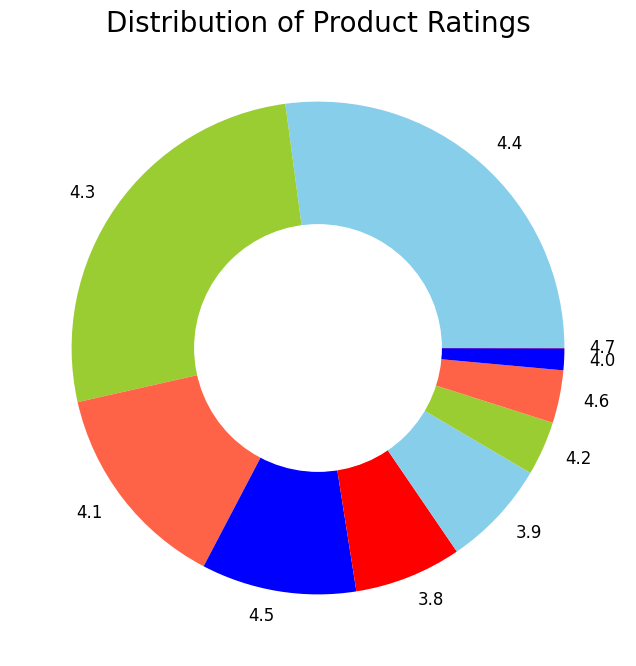

In [49]:
ratings = data["product_rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Product Ratings", fontsize=20)
plt.show()

According to the figure above, more than half of people rated products they bought with 5 stars, which is good. Now, we going to add three more columns to this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the customer reviews mentioned in the Text column of the dataset:

In [48]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["review_text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["review_text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["review_text"]]
print(data.head())

     product_id      brand_name  review_id      review_title  \
12      6836720            Olay   29118808    Horrible cream   
13      6836720            Olay   29475859            Creamy   
14      6836720            Olay   29161134          Olay Aha   
399      785729  Nykaa Naturals   26095043            Got it   
400      785729  Nykaa Naturals   25193805  Works like magic   

                                           review_text              author  \
12                Does nothing, only increases pimples     Gayatri Prakash   
13   I just love the scented about the cream il giv...           ren jamir   
14   Suits perfect for me The only thing that I can...          Anita Dash   
399                         Smaller than what I expect  Malsawmkimi Naulak   
400  This spot patch has saved me so many times. I ...      Ishika Agarwal   

             review_date  review_rating  is_a_buyer  pro_user  ...  \
12   2022-10-05 07:30:15            1.0        True     False  ...   
13   2

Now let’s see how most people rated the products they bought

In [30]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


So, most people are neutral when submitting their experiences with the products they have purchased . Now let’s see the total of all sentiment scores:

In [31]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  3109.9910000000264
Negative:  277.1220000000001
Neutral:  7737.882000000026


So we can say that most of the reviews of the products are neutral, as the total sentiment scores of Positive and Neural are much higher than Negative scores.

In [36]:
unique_product_names = data['product_title'].unique()
print("Unique Product Names:")
print(unique_product_names)

Unique Product Names:
['Olay Ultra Lightweight Moisturiser: Luminous Whip Day Cream (non SPF)'
 'Olay Regenerist Whip Mini and Ultimate Eye Cream Combo'
 'Olay Aha & Niacinamide Super Cream , Acne Mark & Spot Removal Cream - For All Skin Types'
 'Olay White Radiance Day & Night Cream for Brightening and Glow'
 'Olay Total Effects 7 In One Anti-Ageing Day Cream Normal SPF 15'
 'Olay Ultimate Skin Regimen Kit'
 'Olay Eye Cream - With Niacinamide & Pentapeptides'
 'Olay Total Effects Day Cream For Sensitive Skin - Niacinamide'
 'Olay Total Effects 7 In One Day Cream Normal SPF 15 (Trial Size) 8gm'
 'Nykaa Skin Secrets Tea Tree & Salicylic Acid Spot Patch'
 'Nykaa Face and Eye Shield Mask'
 'Nykaa Woman Washable and Reusable Face Mask - Tropical'
 'Nykaa 3 Ply Mask With Face Shield'
 'Nykaa Naturals Apple Cider Vinegar & Ginger Anti-dandruff Hair Oil + Shampoo + Massager Combo'
 'Nykaa Love Struck Tender Touch Shower Gel + Body Lotion + Perfume'
 'Nykaa Naturals Mini Shampoo'
 'Nykaa Natur

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-41-9a5ce6396dbd>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_reviews["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in product_reviews["review_text"]]
<ipython-input-41-9a5ce6396dbd>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_reviews["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in product_reviews["review_text"]]
<ip

+------+------------+-----------------+-----------+-------------------------------------+--------------------------------------------------------------------------------------------------------------------------+-------------+---------------------+---------------+------------+----------+----------------+----------------------------------------------------------+-----+-------+----------------+----------------------+--------------+-------------------------------------------------------------------------------------+----------+----------+---------+
|      | product_id |   brand_name    | review_id |            review_title             |                                                       review_text                                                        |   author    |     review_date     | review_rating | is_a_buyer | pro_user |  review_label  |                      product_title                       | mrp | price | product_rating | product_rating_count | product_tags |               

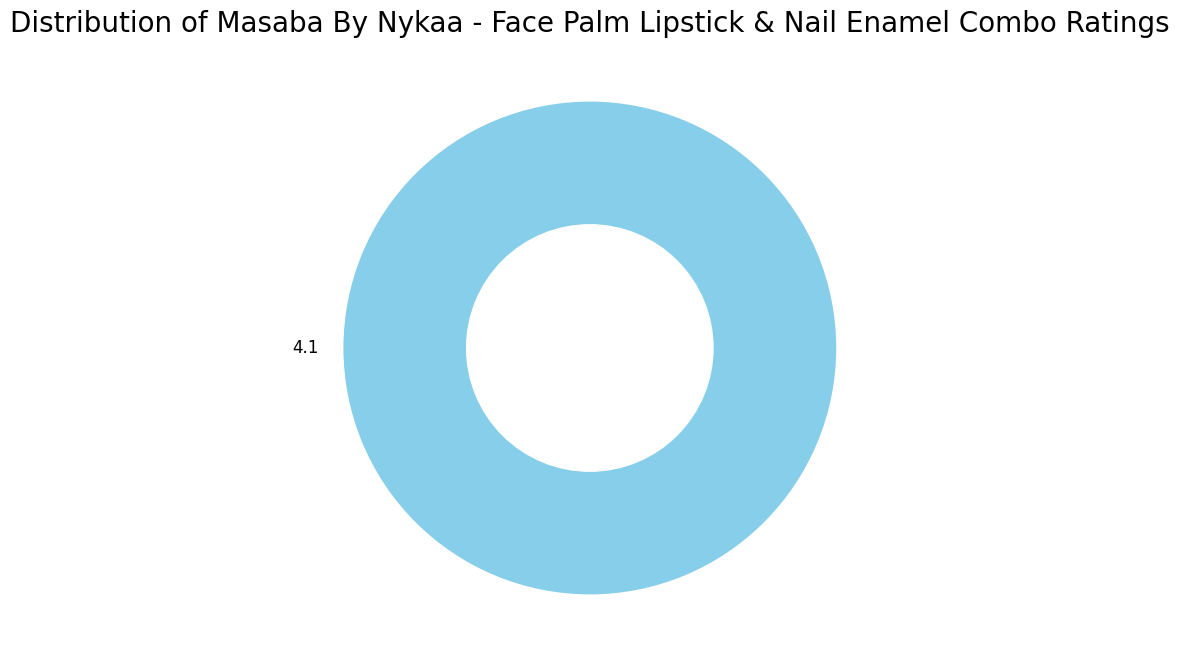

Neutral 🙂 


In [41]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tabulate import tabulate
import matplotlib.pyplot as plt

# Download the vader_lexicon resource
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer instance
sentiments = SentimentIntensityAnalyzer()

# Load your dataset (replace 'your_data.csv' with your actual file name)
data = pd.read_csv('nyka_top_brands_cosmetics_product_reviews.csv')

def analyze_sentiment_for_product(product_name):
    # Filter reviews for the specified product (case-insensitive)
    product_reviews = data[data['product_title'].str.lower() == product_name.lower()]

    if product_reviews.empty:
        print(f"No reviews found for {product_name}.")
        return

    # Perform sentiment analysis on the reviews
    product_reviews["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in product_reviews["review_text"]]
    product_reviews["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in product_reviews["review_text"]]
    product_reviews["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in product_reviews["review_text"]]

    # Display sentiment analysis results for the specified product
    print(tabulate(product_reviews.head(), headers='keys', tablefmt='pretty'))

    # Pie chart for distribution of sentiments
    sentiments_distribution(product_reviews, product_name)

    # Calculate overall sentiment score
    x = sum(product_reviews["Positive"])
    y = sum(product_reviews["Negative"])
    z = sum(product_reviews["Neutral"])

    # Print overall sentiment score
    sentiment_score(x, y, z)

def sentiments_distribution(product_reviews, product_name):
    ratings = product_reviews["product_rating"].value_counts()
    numbers = ratings.index
    quantity = ratings.values

    custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
    plt.figure(figsize=(10, 8))
    plt.pie(quantity, labels=numbers, colors=custom_colors)
    central_circle = plt.Circle((0, 0), 0.5, color='white')
    fig = plt.gcf()
    fig.gca().add_artist(central_circle)
    plt.rc('font', size=12)
    plt.title(f"Distribution of {product_name} Ratings", fontsize=20)
    plt.show()

def sentiment_score(a, b, c):
    if (a > b) and (a > c):
        print("Positive 😊 ")
    elif (b > a) and (b > c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")

# Example: Analyze sentiment for a specific product
analyze_sentiment_for_product('Masaba By Nykaa - Face Palm Lipstick & Nail Enamel Combo')
